In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [275]:
#path='../data/E-Weaver_data.csv'
path='/Users/cmurph53/Documents/GitHub/DSCI591-Fall21-RecommendationSystem/data/E-Weaver_data.csv'
data=pd.read_csv(path, index_col=0)

---

# Gender Plot

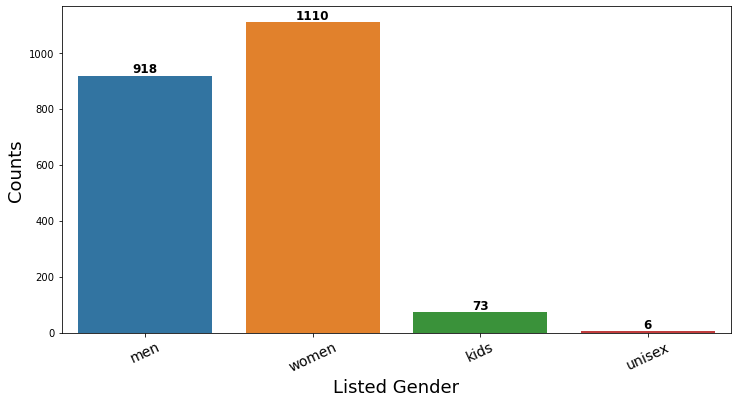

In [278]:
fig, ax = plt.subplots(figsize=(12,6))

sns.countplot(x='gender', data= data, ax=ax)

# add the annotation
ax.bar_label(ax.containers[-1], label_type='edge', fontsize=12, weight='bold')
plt.xticks(rotation=25, fontsize=14)

ax.set(ylabel='Counts', xlabel = 'Listed Gender')
ax.xaxis.get_label().set_fontsize(18)
ax.yaxis.get_label().set_fontsize(18)

#plt.savefig('../figs/gender_counts.jpg', bbox_inches='tight')

# Prices
## Individual Counts

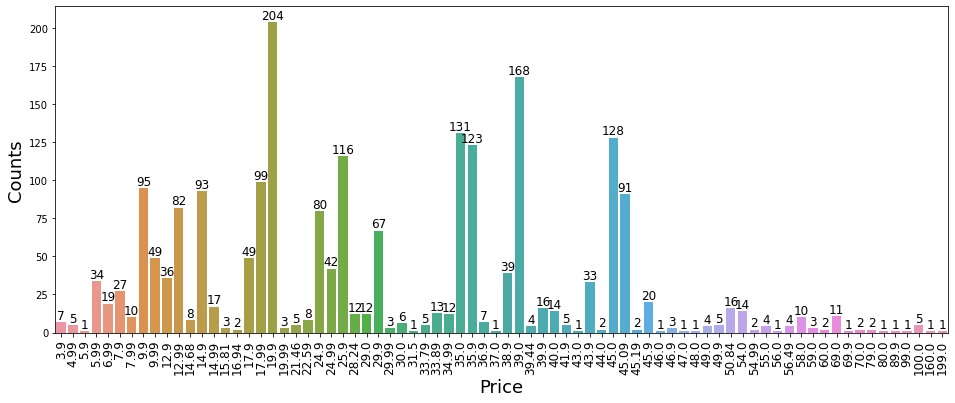

In [76]:
fig, ax = plt.subplots(figsize=(16,6))

sns.countplot(x='price', data= data, ax=ax)


# add the annotation
ax.bar_label(ax.containers[-1], label_type='edge', fontsize=12)
plt.xticks(rotation=90, fontsize=12)

ax.set(ylabel='Counts', xlabel = 'Price')
ax.xaxis.get_label().set_fontsize(18)
ax.yaxis.get_label().set_fontsize(18)

#plt.savefig('../figs/price_counts.jpg', bbox_inches='tight')

## Histogram Counts

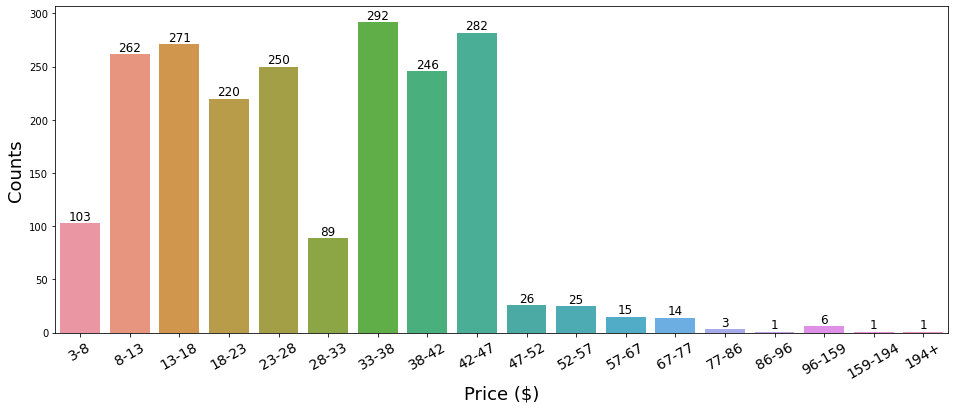

In [271]:
BIN_COUNTS = 40

fig, ax = plt.subplots(figsize=(16,6))
# use numpy histogram so we can perform filtering
hist, bin_edges = np.histogram(data['price'], bins = BIN_COUNTS)
# so we can remove bins with zero entries
non_zero = np.nonzero(hist)
# take only entries where bin is non-zero
hist = hist[non_zero]
bin_edges = bin_edges[non_zero]
# generate labels based on bin edge values (maybe use centers?)
x_ticks = [str(int(edge))+'-'+str(int(bin_edges[i+1]))
           if i<len(bin_edges)-1 else str(int(edge))+'+' for i, edge in enumerate(bin_edges)]
indices = np.arange(len(bin_edges))

sns.barplot(x=indices, y=hist, ax=ax)


_=plt.xticks(indices, x_ticks, rotation=30, fontsize=14)

ax.set(ylabel='Counts', xlabel = 'Price ($)')
ax.xaxis.get_label().set_fontsize(18)
ax.yaxis.get_label().set_fontsize(18)
_=ax.bar_label(ax.containers[-1], label_type='edge', fontsize=12)
#plt.savefig('../figs/price_hist.jpg', bbox_inches='tight')

## Per Brand KDE

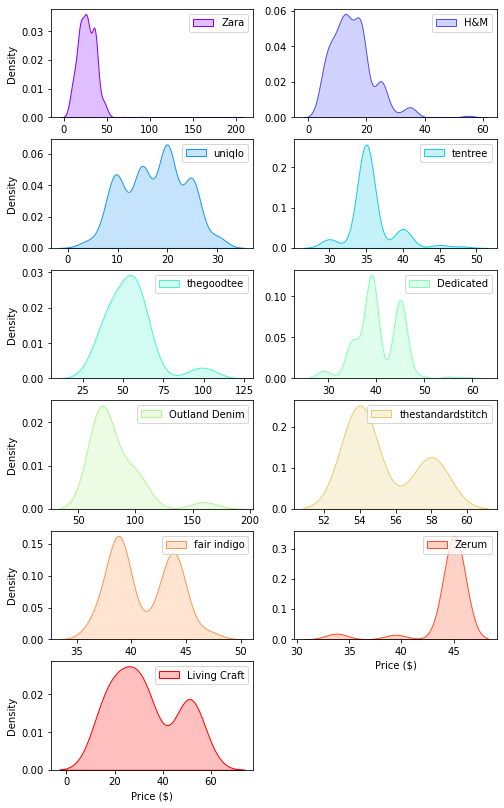

In [254]:
from matplotlib.pyplot import cm

n_brands = len(data['brand'].unique())
fig, axes = plt.subplots(nrows=round(n_brands/2), ncols=2, figsize=(8,14), squeeze=True)
colors = cm.rainbow(np.linspace(0, 1, n_brands))


#set simple itterator to remove y-axis title of 2nd columns
col_i = 0
for ax_i, brand_i, color_i in zip(axes.flatten(), data['brand'].unique(), colors):

    sns.kdeplot(x='price', data= data[data['brand']==brand_i], ax=ax_i, shade=True, color=color_i)

    ax_i.legend(labels=[brand_i], loc='best')
    
    if col_i%2:
        ax_i.set(ylabel='', xlabel = 'Price ($)')
    
    else:
        ax_i.set(ylabel='Density', xlabel = 'Price ($)')

        
    col_i+=1
fig.delaxes(axes[-1][1])
#plt.savefig('../figs/brand_price_density_3.jpg', bbox_inches='tight')


---
# Image Sizes  
## loading up with CV2

In [78]:
# get image dimensions

folder_path = '/Users/cmurph53/Documents/GitHub/DSCI591-Fall21-RecommendationSystem/data'
image_path = folder_path+'/image_data/'


from dask import bag, diagnostics 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os

def get_dims(file):
    
    #make sure the image has RBG dimsensions 
    try:
        img = cv2.imread(file)
        h,w = img.shape[:2]
    except:
        print(file + '\n COULD NOT BE OPENED AND WILL BE DROPPED FROM MAIN DF')
        h,w = 0, 0

    return h,w

# parallelize
#filepath = '../input/inclusive-images-challenge/stage_1_test_images/'
filelist = [image_path + f for f in os.listdir(image_path)]
dimsbag = bag.from_sequence(filelist).map(get_dims)


In [79]:
with diagnostics.ProgressBar():
    dims = dimsbag.compute()
    
dim_df = pd.DataFrame(dims, columns=['height', 'width'])

[##################                      ] | 46% Completed |  9.9s

libpng warning: iCCP: known incorrect sRGB profile


[########################################] | 100% Completed | 13.8s
/Users/cmurph53/Documents/GitHub/DSCI591-Fall21-RecommendationSystem/data/image_data/2381_T-shirt Stockholm Bike Pattern Charcoal_grey_Dedicated.png
 COULD NOT BE OPENED AND WILL BE DROPPED FROM MAIN DF
/Users/cmurph53/Documents/GitHub/DSCI591-Fall21-RecommendationSystem/data/image_data/448_BASIC V-NECK T-SHIRT_Black_Zara.png
 COULD NOT BE OPENED AND WILL BE DROPPED FROM MAIN DF
/Users/cmurph53/Documents/GitHub/DSCI591-Fall21-RecommendationSystem/data/image_data/2615_LEA INNER CIRCLE - MAUVE_mauve_Zerum.png
 COULD NOT BE OPENED AND WILL BE DROPPED FROM MAIN DF


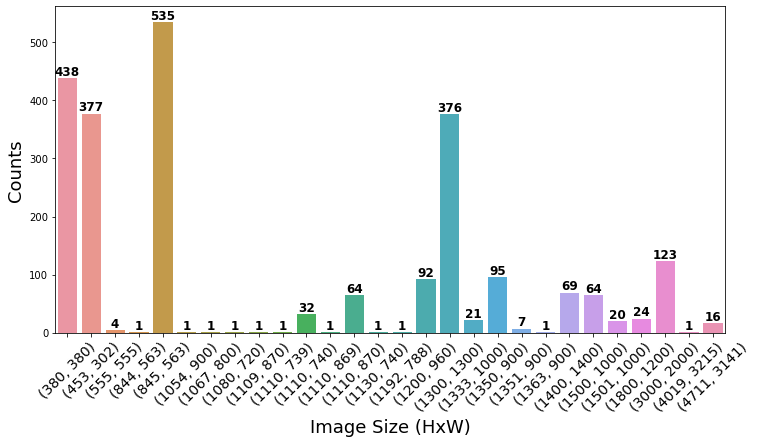

In [83]:
sizes = dim_df.groupby(['height', 'width']).size()
bar_x= [str(i) for i in sizes.keys().to_list()]
bar_y = list(sizes.values)


fig, ax = plt.subplots(figsize=(12,6))

# add the plot - dropping the first bar which is the zero dimensions
sns.barplot(x=(bar_x[1:]), y=(bar_y[1:]), ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], label_type='edge', fontsize=12, weight='bold')
plt.xticks(rotation=45, fontsize=14)

ax.set(ylabel='Counts', xlabel = 'Image Size (HxW)')
ax.xaxis.get_label().set_fontsize(18)
ax.yaxis.get_label().set_fontsize(18)

#plt.savefig('../figs/image_size_eda.jpg', bbox_inches='tight')
